##Actor-Critic Methods

Mario Fiorino

**Introduzione**

I metodi Actor-Critic sono una classe di algoritmi di  policy gradient che combinano due strutture di memoria separate:

- **Actor**, per rappresentare la funzione di policy (o policy) che restituisce *una distribuzione di probabilità sulle azioni* che l'agente può intraprendere in base a un determinato stato. In questo contesto parametrizzata $\mathbf{θ}$. In simboli: $\pi(a_t|s_t;\mathbf{θ}) $

- **Critic**, per rappresentare la *funzione valore (value-fuction)* che determina il rendimento atteso (expected return) per un agente che inizia in un dato stato e agisce per sempre secondo una particolare politica. In questo contesto parametrizzata $\mathbf{w}$. In simboli: $ V(s_t;\mathbf{w} ) $


L'Actor è tipicamente implementato come una rete neurale che apprende una funzione di mappatura da stati ed azioni.

Anche il Critic, è spesso implementato come una rete neurale che apprende una funzione di valore, la quale risolve un problema di policy evaluation (vedi primi notebook del corso), ovvero: "quanto reward accumula la politica $π_θ$ con gli attuali parametri $\mathbf{θ}$ ?"

Il training e di tipo on-policy. In tale fase, Actor, aggiorna i suoi parametri $\mathbf{θ}$, aumentando la probabilità di intraprendere azioni che generano i rendimenti più elevati e così massimizzare la ricompensa attesa - ovvero la funzione obiettivo $J(\mathbf{θ})$ . A tal fine il Critic indica la direzione in cui muoversi nello spazio dei parametri.


$\;$


**Vantaggi**

- Sono utili perché riducono la varianza, accelerando così l’apprendimento di un optimal policy rispetto i metodi Monte Carlo Policy Gradient.

- Sono adatti per applicazioni nello spazio continuo (dove cioè i metodi Monte Carlo Policy Gradient danno problemi)





## Update: One-step Actor-Critic

Ai fini didattici, consideriamo l'algoritmo Actor-Critic:

One-step Actor-Critic (episodic), un algoritmo di tipo online ed incrementale. Anche noto come Advantage Actor Critic (A2C). Nel testo Sutton & Barta, 2018, PDF 354

$\;$

**Critic update**:

Campionata in base alla policy $\pi_\theta$, al time step $t$,  un azione $a_t$ nello stato $s_t$, ed osservati il next state $s_{t+1}$ ed il reward ottenuto $r_t$. Sia ottenuto il segnale TD error relativo alla policy:

$ \delta_t = [r_t + γ \hat{V}(s_{t+1};\mathbf{w}_t)]  - \hat{V}(s_t;\mathbf{w}_t)$

da notare il target : $\;$
$r_t + γ \hat{V}(s_{t+1}; \mathbf{w}_t)$.

La loss function che ottimizza il nostro training : $\; \; \delta_t ^2$

L' update dei parametri del Critic avviene sfruttando i metodi semi-gradient TD(0):

$ \mathbf{w}_{t+1}  ← \mathbf{w}_t + α_w  \cdot \delta_t \cdot ∇_{\mathbf{w}} \hat{V}(s_t;\mathbf{w}_t)$

Dove $α_w$ è il learning rate specifico dei parametri $\mathbf{w}$

Per i passaggi matematici che portano alla formulazione di tale update, basato sull'algoritmo classico del Gradient Descent, consulta il notebook: https://github.com/MarioFiorino/Tutorial-Reinforcement-Learning-ITA-Python/blob/main/Value_Function_Approximation_Compendio.ipynb

Si ricorda che l'aggiornamento viene ottenuto a partire dal gradiente della funzione obiettivo , utilizzando solo in parte la formula per la derivata di una funzione composta $\frac{d f(x)^n}{d x}$. Per ciò  si usa il termine "Metodi Semi-gradient".

$\;$

**Actor update**:

L' update dei parametri del Actor avviene sfruttando i metodi policy gradient. Per il teorema policy gradient possiamo scrive:

$∇_{\mathbf{θ}} J(\mathbf{θ}) \propto  \mathbb{E}_{ τ \sim {\pi_\theta} }   [  \delta_t \cdot ∇_{\mathbf{θ}} \log  \pi_{\mathbf{θ}}(a_t|s_t)] $

Dove: iIl simbolo $\propto$ significa “proporzionale a”.  Mentre $\tau$ indica una traiettoria, o sequenza stato-azione, generata da $\pi_\theta$.

Nota.
Per il gradiente puo esser usata anche la seguente equivalente simbologia:

$∇_{\mathbf{θ}} J(\mathbf{θ}) \propto \frac{1}{N} \sum_{i=1} ^ N [  \sum_{t=0} ^T \delta_t \cdot ∇_{\mathbf{θ}} \log  \pi_{\mathbf{θ}}(a_t|s_t)] $

Dove $T$ è lo step terminale di una traiettoria stato-azione, $N$ è il numero di episodi, o volendo il numero di traiettorie campionate

L' update online incrementale dei parametri durante il training risulta:


$ \mathbf{θ}_{t+1} ← \mathbf{θ}_t + α_θ  \cdot \delta_t \cdot ∇_{θ} \log  \pi(a_t|s_t;\mathbf{θ}_t)$

Dove $α_θ$ è il learning rate specifico dei parametri $\mathbf{θ}$

In pratica si modifica i parametri $\mathbf{θ}$ in modo (o volendo nella direzioni indicata dal gradiente) da massimizzare la probabilità $\log  \pi(a_t|s_t;\mathbf{θ}_t)$, pesata dal valore $\delta_t$,  quest'ultimo dipendente dai reward osservati.


$\;$

Appendice

1.

Per un maggior rigore formale, nel contesto Actor-Critic, prima si introduce la *Advantage Function*,  indicata con $A(s,a) = Q(s,a) - V(s)$ . Questa potrebbe anche esser implementata da due funzioni $Q(s,a)$ , $V(s)$ che utilizzano parametri diversi (ad esempio due reti neurali con architetture differenti). Facendo notare che  $Q(s,a) = \mathbb{E} [ r+\gamma V(s') ] $ ;  il TD error $δ$ è una stima unbiased della Advantage Function, ed è implementato con un unico set di parametri.


2.

L'algoritmo potrebbe essere implementato anche semplicemente usando sola la stima di $Q(s,a)$:

$ \delta = [r + γ \hat{Q}(s',a;\mathbf{w})]  - \hat{Q}(s,a;\mathbf{w})$

$ \mathbf{w} ← \mathbf{w} + α_w  \cdot \delta \cdot ∇_{\mathbf{w}} \hat{Q}(s,a;\mathbf{w})$


$ \mathbf{θ} ← \mathbf{θ} + α_θ  \cdot \hat{Q}(s,a;\mathbf{w})) \cdot ∇_{\mathbf{\theta}} \log  \pi(a|s;\mathbf{θ})$

Tuttavia, l'introduzione del fattore Advantage Function consente di ridurre la varianza rispetto al solo uso di $Q(s,a)$.


$\;$

**Convergenza**

L'algoritmo One-step Actor-Critic converge asintoticamente ad un ottimo locale, in condizioni di approssimazione stocastica standard (stochastic approximation conditions) su entrambi i learning rate.


$\;$

Ref:

http://www.incompleteideas.net/book/ebook/node66.html



https://proceedings.mlr.press/v48/mniha16.pdf


https://web.engr.oregonstate.edu/~afern/classes/cs533/notes/rl3.pdf



## Nota generale sui metodi Policy-based: Parameterization for Continuous Actions


I metodi Policy-based offrono un modo pratico per gestire spazi continui con un numero infinto di azioni.

E' comune l'utilizzo di una distribuzione normale (gaussiana) per rappresentare la distribuzione di probabilità delle azioni dato un certo stato in input. In questo caso, l'algoritmo impara i parametri della distribuzione: media e deviazione standar che determinano la frequenza e la dispersione delle azioni.

Per maggiori info Sutton & Barta, 2018, PDF 357.

## Compendio sulla tipologia dei metodi Policy Gradient

<div>
<img src="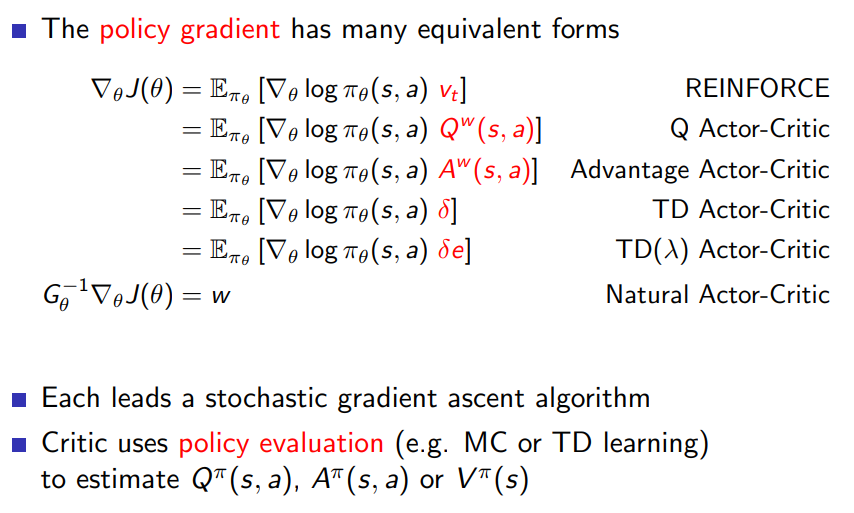
", width="400">
</div>

Compendio del corso di David Silver:

https://www.davidsilver.uk/wp-content/uploads/2020/03/pg.pdf

#Fase di Coding: solving Pendulum with Advantage Actor Critic (A2C)  

## Env: Pendulum(Gym)


$\;$

https://www.gymlibrary.dev/environments/classic_control/pendulum/

https://github.com/openai/gym/blob/cedecb35e3428985fd4efad738befeb75b9077f1/gym/envs/__init__.py#L81



Contesto: spazio continuo

L'obiettivo è applicare una momento meccanica: "Torque" (i cui valori sono continui nel range $[-2,2]$ ) al pendolo per farlo arrivare in posizione verticale, con il centro di gravità proprio sopra il punto fisso.


Di default, l'episodio viene troncato a 200 time step.

Il reward è calcolato in base ad un equazione matematica (vedi documentazione); la cui ricompensa minima che può essere ottenuta è  = -16,2736044, mentre la ricompensa massima è zero (il pendolo è verticale con velocità zero e nessuna coppia applicata).

In [ ]:
import gym
import warnings
warnings.filterwarnings('ignore')

env=gym.make('Pendulum-v1', g=10.00)
#help(env.unwrapped)

max_timeSteps=250


initial_state=env.reset()

for timeIndex in range(1,max_timeSteps+1):


        random_action=env.action_space.sample()

        observation, reward, done, info = env.step(random_action)
        if timeIndex < 3 or timeIndex >199:
          print("timeIndex=",timeIndex)
          print("random_action=",random_action)
          print("[cos(theta),sin(theta),Angular Velocity]",observation)
          print("reward=",reward)
          print("done=",done)
          print("info=",info)
          print("")

        if done:
            break

env.close()

timeIndex= 1
random_action= [-0.1119313]
[cos(theta),sin(theta),Angular Velocity] [-0.623479    0.7818401  -0.43091747]
reward= -5.230693317451939
done= False
info= {}

timeIndex= 2
random_action= [0.91537124]
[cos(theta),sin(theta),Angular Velocity] [-0.6348567   0.7726299   0.29276827]
reward= -5.054857484338681
done= False
info= {}

timeIndex= 200
random_action= [0.74117315]
[cos(theta),sin(theta),Angular Velocity] [-0.13793115 -0.9904418  -0.5911226 ]
reward= -2.821834675092211
done= True
info= {'TimeLimit.truncated': True}



## Moduli ed Inizilizzazione dell'ambiente


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import sys
IN_COLAB = "google.colab" in sys.modules

if IN_COLAB:
    !apt install python-opengl
    !apt install ffmpeg
    !apt install xvfb
    !pip install pyvirtualdisplay
    from pyvirtualdisplay import Display

    # Start virtual display
    dis = Display(visible=0, size=(600, 400))
    dis.start()

import random
from typing import List, Tuple

import gym
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Normal

from IPython.display import clear_output

env=gym.make('Pendulum-v1', g=10.00)
#max_episode_steps=300

#Set Random seed
#if torch.backends.cudnn.enabled:
#    torch.backends.cudnn.benchmark = False
#    torch.backends.cudnn.deterministic = True

#seed = 123
#torch.manual_seed(seed)
#np.random.seed(seed)
#random.seed(seed)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 7,813 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## Actor / Critic  ANNs


Saranno implementate due reti separate:

$\;$

Actor network:

$s_t → \pi(a_t|s_t;\mathbf{θ}) = \mathcal{N} (μ(s_t), \sigma(s_t);\mathbf{θ} ) $

Nota: l'output, ovvero la distribuzione di probabilità delle azioni da intraprendere (dato un certo stato in input), si concretizza con una ditribuzione gaussiana, con il valore della media $μ(s_t)$ uguale al valore dell'azione più probabile in $s_t$ .

L'architettura della rete di Actor è costituita da uno strato nascosto fully connected con funzione di attivazione ReLU, che si ramifica in due strati di output fully connected; per "imparare" rispettivamente la media e la deviazione standard di una distribuzione normale.

L'ambiente Pendulum ha solo una singola azione con un intervallo compreso tra -2 e 2.
Per garantire che l'azione rientri in tale intervallo, l'Actor restituisce un valore medio $μ$ ottenuto da una moltiplicazione per 2 di tanh.
Si ricorda che  tanh normalizza l'output tra -1 e 1.

$\;$

Critic network:

$s_t → V(s_t;\mathbf{w})$


 genera in uscita una value-fuction.

In [ ]:
# Codice ispirato :
# https://github.com/MrSyee/pg-is-all-you-need
# https://colab.research.google.com/github/MrSyee/pg-is-all-you-need/blob/master/01.A2C.ipynb#scrollTo=A4iIMI_UeddW


def initialize_uniformly(layer: nn.Linear, init_w: float = 3e-3):
    """Tale funzione consente di inizializzare in modo uniforme pesi e bias
         in un intervallo di input pari a [-init_w, init_w]."""
    layer.weight.data.uniform_(-init_w, init_w)
    layer.bias.data.uniform_(-init_w, init_w)


#ANN: Actor
class Actor(nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
        super(Actor, self).__init__()

        self.hidden1 = nn.Linear(in_dim, 128)
        self.mu_layer = nn.Linear(128, out_dim)
        self.log_std_layer = nn.Linear(128, out_dim)

        initialize_uniformly(self.mu_layer)
        initialize_uniformly(self.log_std_layer)

    def forward(self, state: torch.Tensor) -> torch.Tensor:

        x = F.relu(self.hidden1(state))

        #Costruisce la distribuzione Gaussiana(mu, std)
        mu = torch.tanh(self.mu_layer(x)) * 2
        # Per un idea della forma di tanh
        #https://www.geeksforgeeks.org/python-pytorch-tanh-method/

        softplus = F.softplus(self.log_std_layer(x))
        # Softplus layer for actor or critic network
        # https://www.mathworks.com/help/reinforcement-learning/ref/rl.layer.softpluslayer.html
        std = torch.exp(softplus)

        distr_gauss = Normal(mu, std)

        #Estrae un azione dalla distribuzione Normale
        action = distr_gauss.sample()

        return action, distr_gauss


#ANN: Critic

class Critic(nn.Module):
    def __init__(self, in_dim: int):
        super(Critic, self).__init__()

        self.hidden1 = nn.Linear(in_dim, 128)
        self.out = nn.Linear(128, 1)

        initialize_uniformly(self.out)

    def swish_fn(self, x): # Swish (Swish-Net activation)
        return x * torch.sigmoid(x)

    def forward(self, state: torch.Tensor) -> torch.Tensor:
        x = self.hidden1(state)
        x = self.swish_fn(x)
        value = self.out(x)

        return value

####Testing of the class

In [ ]:
#Testing Class

t_actor = Actor(env.observation_space.shape[0], env.action_space.shape[0])

st= [-0.6348567,   0.7726299,   0.29276827]

action, distr_gauss= t_actor(torch.FloatTensor(st))
print("action=",action)
print("")
#https://pytorch.org/docs/stable/distributions.html
print("distr_gauss=",distr_gauss)

print("distr_gauss.mean=",distr_gauss.mean) # 'Normal' object attribute/methods : mean, scale, sample(), log_prob()
print("distr_gauss.scale=",distr_gauss.scale) # sarebbe la std
c1 = distr_gauss.sample()
print("distr_gauss.sample=",c1)
print("distr_gauss.sample().clamp=",c1.clamp(min=-2.0, max=2.0).cpu().detach().numpy())
print("")

# .log_prob(value) Returns the log of the probability density/mass function evaluated at value.
log_probil = distr_gauss.log_prob(c1)
print(".log_probil(sample)=",log_probil)
log_probil = distr_gauss.log_prob(c1).sum(dim=-1) # stesso risultato con dim=0, esssendo un solo elemento
print(".log_probil(sample).sum(dim=-1)=",log_probil)
print(".log_probil(mean)=",distr_gauss.log_prob(distr_gauss.mean))


t_critic = Critic(env.observation_space.shape[0])
value_critic = t_critic(torch.FloatTensor(st))
print("\nvalue_critic=",value_critic)

action= tensor([-2.1921])

distr_gauss= Normal(loc: tensor([-0.0082], grad_fn=<MulBackward0>), scale: tensor([2.0033], grad_fn=<ExpBackward0>))
distr_gauss.mean= tensor([-0.0082], grad_fn=<MulBackward0>)
distr_gauss.scale= tensor([2.0033], grad_fn=<ExpBackward0>)
distr_gauss.sample= tensor([-4.0026])
distr_gauss.sample().clamp= [-2.]

.log_probil(sample)= tensor([-3.6016], grad_fn=<SubBackward0>)
.log_probil(sample).sum(dim=-1)= tensor(-3.6016, grad_fn=<SumBackward1>)
.log_probil(mean)= tensor([-1.6137], grad_fn=<SubBackward0>)

value_critic= tensor([0.0024], grad_fn=<ViewBackward0>)


#### Notazioni Tecniche

In [ ]:
#  "->"  è un Type Hints ovvero delle annotazioni,
# nello specifico è detto "Annotations for return type ""
# sono semplici suggerimenti sul tipo di data in uscita dalla funzione;
# Nono sono vincolanti durante l'esecuzione:
# "These expressions are evaluated at compile time and have no life in python’s runtime environment.
# Python does not attach any meaning to these annotations.
# They take life when interpreted by third party libraries, for example, mypy."

# Discorso analogo per ":", detto "Annotations for simple parameters"

#https://www.geeksforgeeks.org/function-annotations-python/
#Nell'esempio sotto si vuole evidenziare, mischiando un po le cose,
# che sono annotazioni, e che non condizionano il codice in esecuzione.
# Ad "n:int" posso dare anche un lista di float ed avere un ritorno dalla funzione diverso da "-> np.array"
def di(n:int=4) -> np.array:
  return sum(n *3)

d = di([1.2,7.7])
print(type(d))
print(d)

<class 'float'>
26.7


In [ ]:
#Python List extend() Method

tree = ['pino', 'quercia']
points = (0, 4, 9)
tree.extend(points)
print(tree)

['pino', 'quercia', 0, 4, 9]


## A2C Agent

Compendio della struttura della classe A2CAgent

| Metodi           | Descrizione                                                 |
|---               |---                                                   |
|select_action     | select an action from the input state.               |
|step              | take an action and return the response of the env.   |
|update_model      | update the model by gradient descent.                |
|train             | train the agent during num_frames.                   |
|test              | test the agent (1 episode).                          |
|plot              | plot the training progresses.                        |

In [ ]:
class A2CAgent:
    """A2CAgent interacting with environment.

    Atribute:
        env (gym.Env): openAI Gym environment
        gamma (float): discount factor
        boost_explaration_weight (float): rate of weighting  into the loss function
        device (torch.device): cpu / gpu
        actor (nn.Module): target actor model to select actions
        critic (nn.Module): critic model to predict state values
        actor_optimizer (optim.Optimizer) : optimizer of actor
        critic_optimizer (optim.Optimizer) : optimizer of critic
        transition (list): temporory storage for the recent transition
        total_step (int): total step numbers
        is_test (bool): flag to show the current mode (train / test)
    """

    def __init__(self, env: gym.Env, gamma: float, boost_explaration_weight: float):

        self.env = env
        self.gamma = gamma
        self.boost_explaration_weight = boost_explaration_weight

        # device: cpu / gpu
        self.device = torch.device(
            "cuda" if torch.cuda.is_available() else "cpu"
        )
        print("Device:",self.device)

        obs_dim = env.observation_space.shape[0]
        action_dim = env.action_space.shape[0]

        # networks
        self.actor = Actor(obs_dim, action_dim) #.to(self.device)
        self.critic = Critic(obs_dim)  #.to(self.device)

        # optimizer
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=1e-4)
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=1e-3)

        # Inizilizza la lista transition che conterrà: (state, log_prob, next_state, reward, done)
        self.transition = list()    # Ci servirà nella fase di calcolo update

        # total steps count
        self.total_step = 0

        # modalità: train / test
        self.is_test = False

    def select_action(self, state: np.ndarray) -> np.ndarray:
        """Seleziona un'azione dallo stato di input"""
        state = torch.FloatTensor(state) #.to(self.device)
        action, dist = self.actor(state)
        selected_action = dist.mean if self.is_test else action # se si è in modalità test,
        # sceglie l'azione più probabile : dist.mean

        if not self.is_test:   # se non si è in modalità test ricava e memorizza la log(prob) per il gradiente
            log_prob = dist.log_prob(selected_action).sum(dim=-1)
            self.transition = [state, log_prob]

        return selected_action.clamp(-2.0, 2.0).cpu().detach().numpy()

    def step(self, action: np.ndarray) -> Tuple[np.ndarray, np.float64, bool]:
        """Esegui un'azione e restituisci la risposta dell'env e memorizza il tutto"""
        next_state, reward, done, _ = self.env.step(action)

        if not self.is_test:
            self.transition.extend([next_state, reward, done]) # memorizza per calcolare l'update

        return next_state, reward, done

    def update_model(self) -> Tuple[torch.Tensor, torch.Tensor]:
        """Update dei due modelli Critic e poi Actor"""

        state, log_prob, next_state, reward, done = self.transition

        # Q_t   = r + gamma * V(s_{t+1})  if state != Terminal
        #       = r                       otherwise
        mask = 1 - done # se done == True allora mask == 0 quindi: targ_value = reward
        next_state = torch.FloatTensor(next_state)#.to(self.device)
        pred_value = self.critic(state)
        targ_value = reward + self.gamma * self.critic(next_state) * mask
        # Critic Loss
        value_loss = F.smooth_l1_loss(pred_value, targ_value.detach())
        #https://pytorch.org/docs/stable/generated/torch.nn.SmoothL1Loss.html

        # update param Critic
        self.critic_optimizer.zero_grad()
        value_loss.backward()
        self.critic_optimizer.step()

        # Advantage Function = Q_t - V(s_t)
        advantage = (targ_value - pred_value).detach()  # roba del tipo : advantage= tensor([-1.8643])
        # Nota : come da algoritmo, vengono utilizzati i valori di pre_value e targ_value
        # non generati dall'aggiornamento dei pesi di sel.critc fatto al rigo sopra


        # update param Actor
        policy_loss = -advantage * log_prob

        # Lo scopo di tale istruzione è di dare un reward maggiore a quelle azioni meno esplorate
        # cioè quelle azioni con una maggiroe imprevedibilità
        policy_loss += self.boost_explaration_weight * -log_prob
        #Ricorda : L'uso delle probabilità logaritmiche significa rappresentare le probabilità
        #su una scala (-inf,0] invece che tra [0,1]

        self.actor_optimizer.zero_grad()
        policy_loss.backward()
        self.actor_optimizer.step()

        return policy_loss.item(), value_loss.item()

    def train(self, num_frames: int, plotting_interval: int = 25_000):
        """Fase di Training"""
        self.is_test = False

        actor_losses, critic_losses, scores = [], [], []
        state = self.env.reset()
        score = 0

        for self.total_step in range(1, num_frames + 1):
            action = self.select_action(state)
            next_state, reward, done = self.step(action)

            actor_loss, critic_loss = self.update_model()
            actor_losses.append(actor_loss)
            critic_losses.append(critic_loss)

            state = next_state
            score += reward

            # controlla e modula nel tempo il fattore "boost_explaration_weight"
            if (self.total_step % (num_frames/4) == 0):
              self.boost_explaration_weight  = self.boost_explaration_weight * 0.5


            #A fine episodio
            if done:
                state = env.reset()
                scores.append(score)
                score = 0

            # plot
            if self.total_step % plotting_interval == 0:
                self._plot(self.total_step, scores, actor_losses, critic_losses)

        self.env.close()

    def test(self):
        """Fase di Testing"""
        self.is_test = True

        state = self.env.reset()
        done = False
        score = 0

        frames = []
        while not done:
            frames.append(self.env.render(mode="rgb_array"))
            action = self.select_action(state)
            next_state, reward, done = self.step(action)

            state = next_state
            score += reward

        self.env.close()

        return frames, score

    def _plot(
        self,
        frame_idx: int,
        scores: List[float],
        actor_losses: List[float],
        critic_losses: List[float],
    ):
        """Plot the training progresses."""
        def subplot(loc: int, title: str, values: List[float]):
            plt.subplot(loc)
            plt.title(title)
            plt.plot(values)

        subplot_params = [
            (131, f"frame {frame_idx}. score: {np.mean(scores[-10:])}", scores),
            (132, "actor_loss", actor_losses),
            (133, "critic_loss", critic_losses),
        ]

        clear_output(True)
        plt.figure(figsize=(30, 5))
        for loc, title, values in subplot_params:
            subplot(loc, title, values)
        plt.show()

## Parametri

In [ ]:
num_frames = 100_000
# Nota: episode truncates at 200 time steps.

gamma = 0.95

boost_explaration_weight = 1  # valore di partenza, che scenderà durante il training
#Note Sperimentali
#Per un valore di partenza boost_explaration_weight = 10
# nel grafico del training, la "linea" degli score/nr_episodi smette di salire ed inizia a stabilizzarsi
# intorno ai -200/250 punti, verso i 400 episodi.
# Discorso simile se il valore di partenza è negativo: boost_explaration_weight = -10,
# e nel test finale sui 100 campioni abbiamo : A better score than the  -150  was taken in  63.0 % of times
#Per un valore di partenza negativo boost_explaration_weight = -1
# i risultati generali sono pressochè simili al boost_explaration_weight = 1 qui mostrato.
#Per un valore costante di boost_explaration_weight = 0,
# i risultati dei grafici di training sono pressochè simili al boost_explaration_weight = 1.
# In tal caso però, nei test su 100 campioni risulta: A better score than the  -150  was taken in  45.0 % of times
#

agent = A2CAgent(env, gamma, boost_explaration_weight)

Device: cpu


##Train

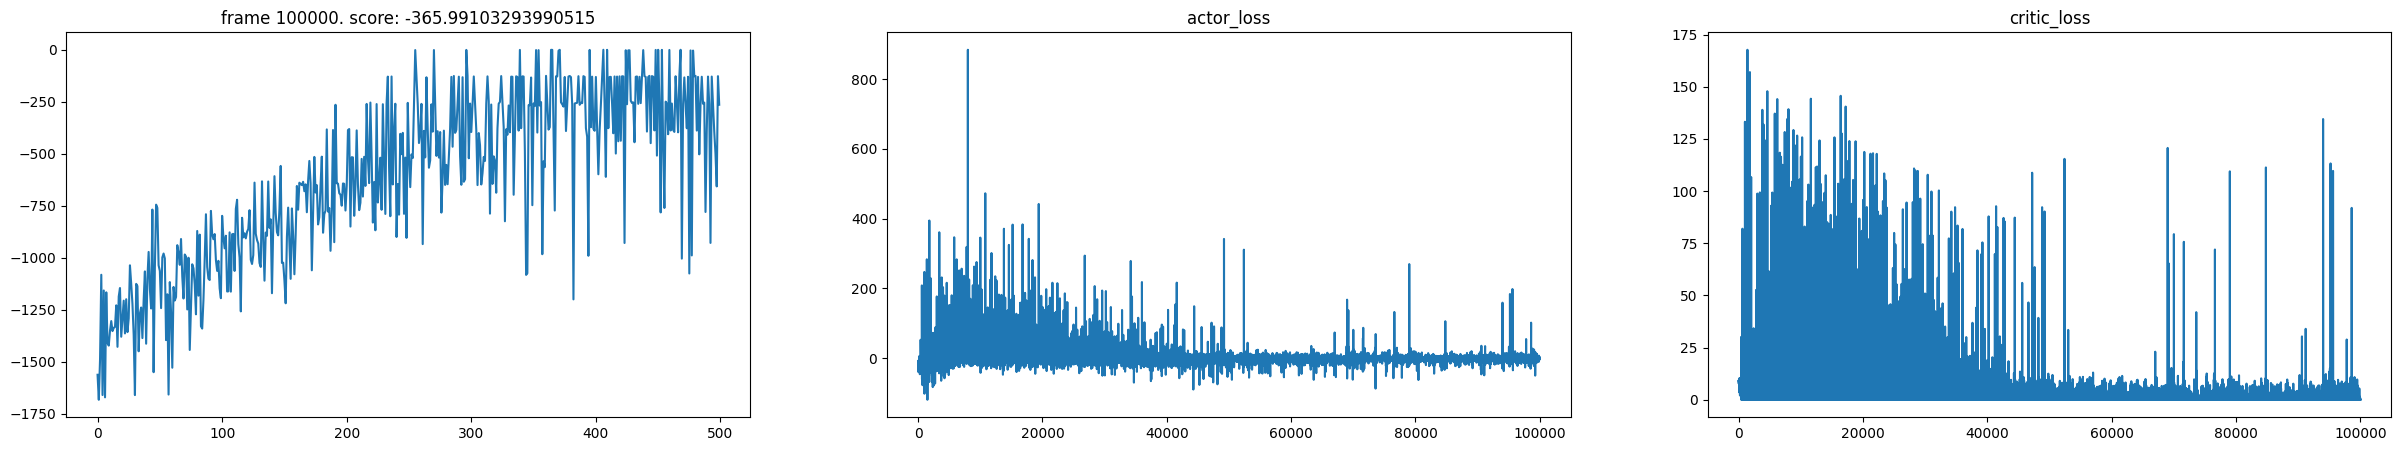

In [ ]:
agent.train(num_frames)

In [ ]:
agent.boost_explaration_weight

0.0625

## Test singolo

In [ ]:
# test

from gym.wrappers.record_video import RecordVideo

if IN_COLAB:
    agent.env = gym.wrappers.RecordVideo(agent.env, "videos")
frames,score = agent.test()
print("Score: ", score)

### Render

In [ ]:
if IN_COLAB:  # colab
    import base64
    import glob
    import io
    import os

    from IPython.display import HTML, display

    def ipython_show_video(path: str) -> None:
        """Show a video at `path` within IPython Notebook."""
        if not os.path.isfile(path):
            raise NameError("Cannot access: {}".format(path))

        video = io.open(path, "r+b").read()
        encoded = base64.b64encode(video)

        display(HTML(
            data="""
            <video alt="test" controls>
            <source src="data:video/mp4;base64,{0}" type="video/mp4"/>
            </video>
            """.format(encoded.decode("ascii"))
        ))

    list_of_files = glob.glob("videos/*.mp4")
    latest_file = max(list_of_files, key=os.path.getctime)
    print(latest_file)
    ipython_show_video(latest_file)

else:  # for jupyter
    from matplotlib import animation
    from JSAnimation.IPython_display import display_animation
    from IPython.display import display


    def display_frames_as_gif(frames):
        """Displays a list of frames as a gif, with controls."""
        patch = plt.imshow(frames[0])
        plt.axis('off')

        def animate(i):
            patch.set_data(frames[i])

        anim = animation.FuncAnimation(
            plt.gcf(), animate, frames = len(frames), interval=50
        )
        display(display_animation(anim, default_mode='loop'))


    # display
    display_frames_as_gif(frames)

videos/rl-video-episode-0.mp4


##Test su 100 campioni

https://github.com/openai/gym/wiki/Leaderboard

In [ ]:
import warnings
warnings.filterwarnings('ignore')
env=gym.make('Pendulum-v1', g=10.00)

episodeNumber=100

cont = 0
max_reward = -150

for episodeIndex in range(1,episodeNumber):
        _,score = agent.test()
        #print(score)
        if max_reward < score:
              cont += 1

agent.env.close()

print("A better score than the ", max_reward, " was taken in ", round((cont/episodeNumber)*episodeNumber,2), "% of times" )

A better score than the  -150  was taken in  62.0 % of times


#Supplemento Actor-Critic Methods: Entropy regularization

Premessa

Nell'ambito dell'informatica, l'entropia è usata per quantificare il grado di casualità di una variabile casuale. In parole semplici ci dice quanto sia imprevedibile o incerto un certo evento.

Consideriamo l'esempio di una moneta. Se la moneta è truccata in modo tale che la probabilità di ottenere testa sia molto più alta di quella di ottenere croce, la sua entropia sarà bassa. Ciò significa che il risultato del lancio è prevedibile con alta probabilità e l'informazione contenuta nel lancio è limitata. Al contrario, se la moneta non è truccata e ha uguali probabilità di cadere su testa o croce, la sua entropia sarà più alta.


Entropia di una moneta truccata:

$H(d_1) =-[\frac{3}{4}\log\frac{3}{4}+\frac{1}{4}\log\frac{1}{4}]=0.56$

Entropia di una moneta onesta:

$H(d_2)=-[\frac{1}{2}\log\frac{1}{2}+\frac{1}{2}\log\frac{1}{2}]= 0.69$



$\;$


$\;$

**Entropy-regularized reinforcement learning**

Nell'ambito del Reinforcement Learning, la policy può essere addestrata a massimizzare un compromesso tra rendimento atteso ed entropia (pensata come misura della casualità, in inglese : randomnes, della policy): un aumento dell'entropia può tradursi in una maggiore esplorazione, che può accelerare l’apprendimento, e/o, impedire che la politica converga prematuramente verso "bad local optimum".


Per incoraggiare l'esplorazione, ad ogni time-step, l'agente riceve una ricompensa proporzionale all'entropia della policy in quel dato step. Quest'idea modifica l'impostazione del problema di RL nel seguente modo:


$$\pi^* = \arg \max_{\pi} \underset{\tau\sim\pi}{\mathbb{E}} \bigg[{ \sum_{t=0}^{\infty} \gamma^t \bigg( R(s_t, a_t, s_{t+1}) + \beta H\left(\pi(\cdot|s_t)\right) \bigg)}\bigg]$$

$\beta > 0$ è il trade-off coefficient.

Possiamo anche definire le funzioni di valore $V^{\pi}$ in modo da includere i bonus entropici di ogni time-step:



$$V^{\pi}(s) = \underset{\tau\sim\pi}{\mathbb{E}} \bigg[ { \left. \sum_{t=0}^{\infty} \gamma^t \bigg( R(s_t, a_t, s_{t+1}) + \beta H\left(\pi(\cdot|s_t)\right) \bigg) \right| s_0 = s}\bigg]$$


$\;$

Ref:

https://spinningup.openai.com/en/latest/algorithms/sac.html